# Data Preprocessing

In [1]:
# Import dependencies
import pandas as pd
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [2]:
# Import PLACES data
places_df = pd.read_csv("./Resources/processed_PLACES_COPD.csv")
places_df = places_df.drop(["State_County"], axis=1)
places_df.head()

,State,County,Levels_Smokers,Levels_COPD
0,Iowa,Cass,19.3,8.3
1,Iowa,Monona,18.5,8.3
2,Alaska,Dillingham,31.1,8.9
3,Colorado,Custer,13.8,7.5
4,Alaska,Ketchikan Gateway,19.4,6.6


In [3]:
# Import Coal Mines data
coal_df = pd.read_csv("./Resources/processed_Coal_Mines.csv")
coal_df = coal_df.drop(["State_County"], axis=1)
coal_df.head()

,State,County,Surface_Mines,Underground_Mines
0,Alabama,Walker,22,2.0
1,Alabama,Jefferson,22,5.0
2,Alabama,Jefferson,13,5.0
3,Alabama,Tuscaloosa,13,12.0
4,Alabama,Jefferson,13,14.0


In [4]:
# Import Air Quality data
aqi_df = pd.read_csv("./Resources/processed_Decade_Air_Quality.csv")
aqi_df = aqi_df.drop(["State_County"], axis=1)
aqi_df.head()

,State,County,Days_with_AQI,Good_Days,Moderate_Days,Unhealthy_for_Sensitive_Groups_Days,Unhealthy_Days,Very_Unhealthy_Days,Hazardous_Days
0,Alabama,Baldwin,523.0,455.0,66.0,2.0,0.0,0.0,0.0
1,Alabama,Clay,226.0,194.0,32.0,0.0,0.0,0.0,0.0
2,Alabama,Colbert,586.0,472.0,114.0,0.0,0.0,0.0,0.0
3,Alabama,DeKalb,724.0,635.0,89.0,0.0,0.0,0.0,0.0
4,Alabama,Elmore,472.0,436.0,36.0,0.0,0.0,0.0,0.0


In [5]:
# Import Census 2019 data
census_df = pd.read_csv("./Resources/processed_census_data.csv")
census_df = census_df.drop(["State_County"], axis=1)
census_df.head()

,State,County,PERC_TOT_MALE_0,PERC_TOT_FEMALE_0,PERC_WA_MALE_0,PERC_WA_FEMALE_0,PERC_BA_MALE_0,PERC_BA_FEMALE_0,PERC_IA_MALE_0,PERC_IA_FEMALE_0,...,PERC_HWAC_MALE_18,PERC_HWAC_FEMALE_18,PERC_HBAC_MALE_18,PERC_HBAC_FEMALE_18,PERC_HIAC_MALE_18,PERC_HIAC_FEMALE_18,PERC_HAAC_MALE_18,PERC_HAAC_FEMALE_18,PERC_HNAC_MALE_18,PERC_HNAC_FEMALE_18
0,Alabama,Autauga County,48.492008,51.507992,37.369561,38.892767,9.373714,10.739408,0.216578,0.259536,...,0.747863,1.282051,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0
1,Alabama,Baldwin County,48.490373,51.509627,42.471129,44.969852,4.249353,4.527536,0.404508,0.375839,...,0.427350,0.899685,0.0,0.000000,0.0,0.022492,0.0,0.0,0.000000,0.0
2,Alabama,Barbour County,52.920684,47.079316,25.881066,23.272300,25.565098,22.664668,0.417241,0.271409,...,0.639659,0.426439,0.0,0.213220,0.0,0.213220,0.0,0.0,0.000000,0.0
3,Alabama,Bibb County,53.268733,46.731267,39.144414,37.621684,13.132982,8.136108,0.236671,0.223274,...,1.028278,0.000000,0.0,0.514139,0.0,0.000000,0.0,0.0,0.000000,0.0
4,Alabama,Blount County,49.237367,50.762633,47.137966,48.687442,0.892332,0.798949,0.332031,0.307820,...,1.818182,0.545455,0.0,0.000000,0.0,0.000000,0.0,0.0,0.090909,0.0


In [6]:
# Merge places and coal dataframes
merged_df = pd.merge(places_df, coal_df, on=["State", "County"], how="left")
merged_df

,State,County,Levels_Smokers,Levels_COPD,Surface_Mines,Underground_Mines
0,Iowa,Cass,19.3,8.3,NaN,NaN
1,Iowa,Monona,18.5,8.3,NaN,NaN
2,Alaska,Dillingham,31.1,8.9,NaN,NaN
3,Colorado,Custer,13.8,7.5,NaN,NaN
4,Alaska,Ketchikan Gateway,19.4,6.6,NaN,NaN
...,...,...,...,...,...,...
3176,Wisconsin,Sauk,16.8,6.5,NaN,NaN
3177,Wisconsin,Brown,15.1,5.5,NaN,NaN
3178,West Virginia,Webster,26.8,15.3,NaN,NaN
3179,Wisconsin,Winnebago,17.1,5.8,NaN,NaN


In [7]:
# Merge in the Air Quality data
merged_df = pd.merge(merged_df, aqi_df, on=["State", "County"], how="left")
merged_df

,State,County,Levels_Smokers,Levels_COPD,Surface_Mines,Underground_Mines,Days_with_AQI,Good_Days,Moderate_Days,Unhealthy_for_Sensitive_Groups_Days,Unhealthy_Days,Very_Unhealthy_Days,Hazardous_Days
0,Iowa,Cass,19.3,8.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Iowa,Monona,18.5,8.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Alaska,Dillingham,31.1,8.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Colorado,Custer,13.8,7.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Alaska,Ketchikan Gateway,19.4,6.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3176,Wisconsin,Sauk,16.8,6.5,NaN,NaN,678.0,571.0,103.0,4.0,0.0,0.0,0.0
3177,Wisconsin,Brown,15.1,5.5,NaN,NaN,722.0,546.0,168.0,8.0,0.0,0.0,0.0
3178,West Virginia,Webster,26.8,15.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3179,Wisconsin,Winnebago,17.1,5.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# Merge in the census data
merged_df = pd.merge(merged_df, census_df, on=["State", "County"], how="left")
pd.set_option('display.max_columns', None)
merged_df

State             County  Levels_Smokers  Levels_COPD  \
0              Iowa               Cass            19.3          8.3   
1              Iowa             Monona            18.5          8.3   
2            Alaska         Dillingham            31.1          8.9   
3          Colorado             Custer            13.8          7.5   
4            Alaska  Ketchikan Gateway            19.4          6.6   
...             ...                ...             ...          ...   
3176      Wisconsin               Sauk            16.8          6.5   
3177      Wisconsin              Brown            15.1          5.5   
3178  West Virginia            Webster            26.8         15.3   
3179      Wisconsin          Winnebago            17.1          5.8   
3180      Wisconsin           Waukesha            12.6          4.7   

      Surface_Mines  Underground_Mines  Days_with_AQI  Good_Days  \
0               NaN                NaN            NaN        NaN   
1               NaN                NaN            NaN        NaN   
2               NaN                NaN            NaN        NaN   
3               NaN                NaN            NaN        NaN   
4               NaN                NaN            NaN        NaN   
...             ...                ...            ...        ...   
3176            NaN                NaN          678.0      571.0   
3177            NaN                NaN          722.0      546.0   
3178            NaN                NaN            NaN        NaN   
3179            NaN                NaN            NaN        NaN   
3180            NaN                NaN          682.0      531.0   

      Moderate_Days  Unhealthy_for_Sensitive_Groups_Days  Unhealthy_Days  \
0               NaN                                  NaN             NaN   
1               NaN                                  NaN             NaN   
2               NaN                                  NaN             NaN   
3               NaN                                  NaN             NaN   
4               NaN                                  NaN             NaN   
...             ...                                  ...             ...   
3176          103.0                                  4.0             0.0   
3177          168.0                                  8.0             0.0   
3178            NaN                                  NaN             NaN   
3179            NaN                                  NaN             NaN   
3180          148.0                                  3.0             0.0   

      Very_Unhealthy_Days  Hazardous_Days  PERC_TOT_MALE_0  PERC_TOT_FEMALE_0  \
0                     NaN             NaN              NaN                NaN   
1                     NaN             NaN              NaN                NaN   
2                     NaN             NaN              NaN                NaN   
3                     NaN             NaN              NaN                NaN   
4                     NaN             NaN              NaN                NaN   
...                   ...             ...              ...                ...   
3176                  0.0             0.0              NaN                NaN   
3177                  0.0             0.0              NaN                NaN   
3178                  NaN             NaN              NaN                NaN   
3179                  NaN             NaN              NaN                NaN   
3180                  0.0             0.0              NaN                NaN   

      PERC_WA_MALE_0  PERC_WA_FEMALE_0  PERC_BA_MALE_0  PERC_BA_FEMALE_0  \
0                NaN               NaN             NaN               NaN   
1                NaN               NaN             NaN               NaN   
2                NaN               NaN             NaN               NaN   
3                NaN               NaN             NaN               NaN   
4                NaN               NaN             NaN               NaN   
..

In [9]:
# View null values
merged_df.isnull().sum()

State                     0
County                    1
Levels_Smokers            0
Levels_COPD               0
Surface_Mines          3078
                       ... 
PERC_HIAC_FEMALE_18    3181
PERC_HAAC_MALE_18      3181
PERC_HAAC_FEMALE_18    3181
PERC_HNAC_MALE_18      3181
PERC_HNAC_FEMALE_18    3181
Length: 1381, dtype: int64

In [10]:
# View the county with a NaN value
merged_df[merged_df['County'].isnull()]

,State,County,Levels_Smokers,Levels_COPD,Surface_Mines,Underground_Mines,Days_with_AQI,Good_Days,Moderate_Days,Unhealthy_for_Sensitive_Groups_Days,...,PERC_HWAC_MALE_18,PERC_HWAC_FEMALE_18,PERC_HBAC_MALE_18,PERC_HBAC_FEMALE_18,PERC_HIAC_MALE_18,PERC_HIAC_FEMALE_18,PERC_HAAC_MALE_18,PERC_HAAC_FEMALE_18,PERC_HNAC_MALE_18,PERC_HNAC_FEMALE_18
33,United States,NaN,15.3,6.6,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# Drop the row containing "United States"
merged_df = merged_df[merged_df.State != "United States"]
merged_df.isnull().sum()

State                     0
County                    0
Levels_Smokers            0
Levels_COPD               0
Surface_Mines          3077
                       ... 
PERC_HIAC_FEMALE_18    3180
PERC_HAAC_MALE_18      3180
PERC_HAAC_FEMALE_18    3180
PERC_HNAC_MALE_18      3180
PERC_HNAC_FEMALE_18    3180
Length: 1381, dtype: int64

In [12]:
# Fill Nulls from states without mines to be 0
merged_df = merged_df.fillna(0)
merged_df.isnull().sum()

State                  0
County                 0
Levels_Smokers         0
Levels_COPD            0
Surface_Mines          0
                      ..
PERC_HIAC_FEMALE_18    0
PERC_HAAC_MALE_18      0
PERC_HAAC_FEMALE_18    0
PERC_HNAC_MALE_18      0
PERC_HNAC_FEMALE_18    0
Length: 1381, dtype: int64

In [13]:
# Drop County name as it might confuse the model
merged_df = merged_df.drop(["County"], axis=1)

# Encode the Data

In [14]:
# Prepare for label encoding
le = LabelEncoder()
encoded_df = merged_df.copy()

In [15]:
# Filter all string object data types into a dataframe_cat for encoding
dataframe_cat = merged_df.dtypes[merged_df.dtypes == "object"].index.tolist()

dataframe_cat

['State']

In [16]:
# For loop to encode text columns to numerical values
for column in dataframe_cat:
    encoded_df[column] = le.fit_transform(merged_df[column])


encoded_df.head()

,State,Levels_Smokers,Levels_COPD,Surface_Mines,Underground_Mines,Days_with_AQI,Good_Days,Moderate_Days,Unhealthy_for_Sensitive_Groups_Days,Unhealthy_Days,...,PERC_HWAC_MALE_18,PERC_HWAC_FEMALE_18,PERC_HBAC_MALE_18,PERC_HBAC_FEMALE_18,PERC_HIAC_MALE_18,PERC_HIAC_FEMALE_18,PERC_HAAC_MALE_18,PERC_HAAC_FEMALE_18,PERC_HNAC_MALE_18,PERC_HNAC_FEMALE_18
0,15,19.3,8.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,15,18.5,8.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,31.1,8.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,5,13.8,7.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,19.4,6.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Split, Train, Test

In [17]:
# Split our preprocessed data into our features and target arrays
X = encoded_df.drop("Levels_COPD", axis=1)
y = encoded_df["Levels_COPD"]


# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [18]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Find Correlation Between Features and Target

In [19]:
correlation_df = encoded_df[["State", "Levels_Smokers", "Surface_Mines", 
                             "Underground_Mines", "Good_Days", "Levels_COPD"]]

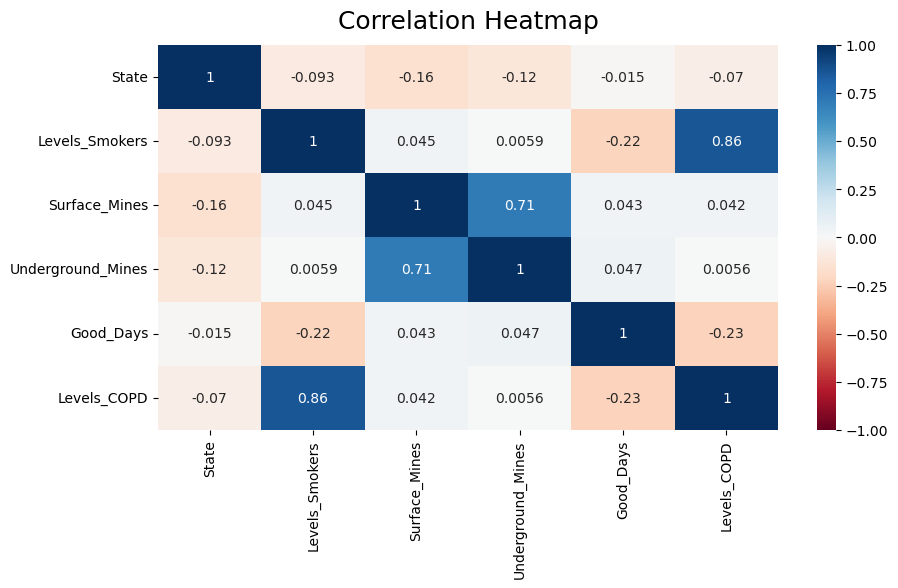

In [20]:
plt.figure(figsize=(10, 5))
heatmap = sb.heatmap(correlation_df.corr(), vmin=-1, vmax=1, annot=True, cmap='RdBu')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);
# save heatmap as .png file
# dpi - sets the resolution of the saved image in dots/inches
# bbox_inches - when set to 'tight' - does not allow the labels to be cropped
plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')

In [21]:
len(X_train.columns)

1379

In [22]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train.columns)
hidden_nodes_layer1 = len(X_train.columns) / 2
hidden_nodes_layer2 = len(X_train.columns) / 3
hidden_nodes_layer3 = len(X_train.columns) / 4
# hidden_nodes_layer4 = len(X_train[0]) / 5
# hidden_nodes_layer5 = len(X_train[0]) / 6

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)
# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# # Fourth hidden layer
# nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer4, activation="relu"))

# # Fifth hidden layer
# nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer5, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="linear"))

# Check the structure of the model
nn.summary()

Metal device set to: Apple M1 Max
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 689)               950820    
                                                                 
 dense_1 (Dense)             (None, 459)               316710    
                                                                 
 dense_2 (Dense)             (None, 344)               158240    
                                                                 
 dense_3 (Dense)             (None, 1)                 345       
                                                                 
Total params: 1,426,115
Trainable params: 1,426,115
Non-trainable params: 0
_________________________________________________________________


2022-11-18 15:25:24.095602: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-11-18 15:25:24.095718: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [23]:
# # Import checkpoint dependencies
# import os
# from tensorflow.keras.callbacks import ModelCheckpoint

# # Define the checkpoint path and filenames
# os.makedirs("optimized_checkpoints/",exist_ok=True)
# checkpoint_path = "optimized_checkpoints/weights.{epoch:02d}.hdf5"

In [26]:
# Compile the model
nn.compile(optimizer='adam', loss='mean_squared_error', metrics=[tf.keras.metrics.RootMeanSquaredError()])

# # Create a callback that saves the model's weights every 5 epochs
# cp_callback = ModelCheckpoint(
#     filepath = checkpoint_path,
#     verbose = 1,
#     save_weights_only = True,
#     save_freq = 5
# )

In [27]:
# Train the model
# fit_model = nn.fit(X_train_scaled, y_train, epochs=1, callbacks=[cp_callback])
# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=75)

Epoch 1/75


2022-11-18 15:26:28.940964: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


75/75 [==============================] - 1s 7ms/step - loss: 12.6400 - root_mean_squared_error: 3.5553
Epoch 2/75
75/75 [==============================] - 0s 6ms/step - loss: 2.2857 - root_mean_squared_error: 1.5118
Epoch 3/75
75/75 [==============================] - 0s 7ms/step - loss: 2.0021 - root_mean_squared_error: 1.4149
Epoch 4/75
75/75 [==============================] - 1s 7ms/step - loss: 1.6614 - root_mean_squared_error: 1.2890
Epoch 5/75
75/75 [==============================] - 1s 7ms/step - loss: 1.5655 - root_mean_squared_error: 1.2512
Epoch 6/75
75/75 [==============================] - 1s 7ms/step - loss: 1.4753 - root_mean_squared_error: 1.2146
Epoch 7/75
75/75 [==============================] - 0s 7ms/step - loss: 1.4457 - root_mean_squared_error: 1.2024
Epoch 8/75
75/75 [==============================] - 1s 7ms/step - loss: 1.5375 - root_mean_squared_error: 1.2400
Epoch 9/75
75/75 [==============================] - 1s 7ms/step - loss: 1.4634 - root_mean_squared_error: 

75/75 [==============================] - 0s 7ms/step - loss: 1.1558 - root_mean_squared_error: 1.0751
Epoch 74/75
75/75 [==============================] - 0s 6ms/step - loss: 1.2421 - root_mean_squared_error: 1.1145
Epoch 75/75
75/75 [==============================] - 0s 6ms/step - loss: 1.1772 - root_mean_squared_error: 1.0850


In [ ]:
# # Evaluate the model using the test data
# model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
# print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

In [ ]:
# # Export our model to HDF5 file
# nn.save('COPD_DeepLearning.h5')